In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl (2.2 MB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- -------------------------------

In [2]:
pip install seaborn

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [34]:
# loading Dataset
df=pd.read_csv("week2_dataset.csv")

In [35]:
# Displaying first 10 records
df.head(10)

,Date,Region,Product,Sales,Profit,Quantity,Rating
0,12-04-2024,North,Product C,445,-20.0,17.0,3.9
1,14-12-2024,East,Product C,356,452.0,6.0,1.1
2,27-09-2024,East,Product D,78,0.0,17.0,4.8
3,16-04-2024,North,Product B,883,432.0,7.0,2.4
4,12-03-2024,West,Product A,758,75.0,7.0,1.9
5,07-07-2024,North,Product C,730,122.0,4.0,3.9
6,21-01-2024,West,Product A,972,323.0,NaN,3.3
7,12-04-2024,West,Product B,15,149.0,6.0,3.2
8,01-05-2024,West,Product A,143,216.0,12.0,1.4
9,02-08-2024,North,Product D,651,339.0,7.0,3.2


In [36]:
# DATA CLEANING : Replacing null values in each column with mean of respective column for numerical data
# first ensuring columns are numeric. In case not, assigning null values to the non-numeric values.
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce')
df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')
df['Profit']=df['Profit'].fillna(df['Profit'].mean())
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [37]:
# Handling negative sales value
# rows where sales>=0 is satisfied are retained and with negatives values are ignored
df=df[df['Sales']>=0]

In [38]:
# Adding Sales category for analysis 
conditions=[
    (df['Sales'] >= 200),
    (df['Sales'] <200) & (df['Sales'] >=100),
    (df['Sales'] < 100)
]
categories=['High','Medium','Low']

# Assigning categories to the sales now
df.loc[:, 'Sales category'] = np.select(conditions, categories, default='Unknown')

In [39]:
# Data Aggregation
aggregated_data=df.groupby(['Region','Product']).agg(
    Total_Sales=('Sales','sum'),
    Avg_Profit=('Profit','mean')
).reset_index()

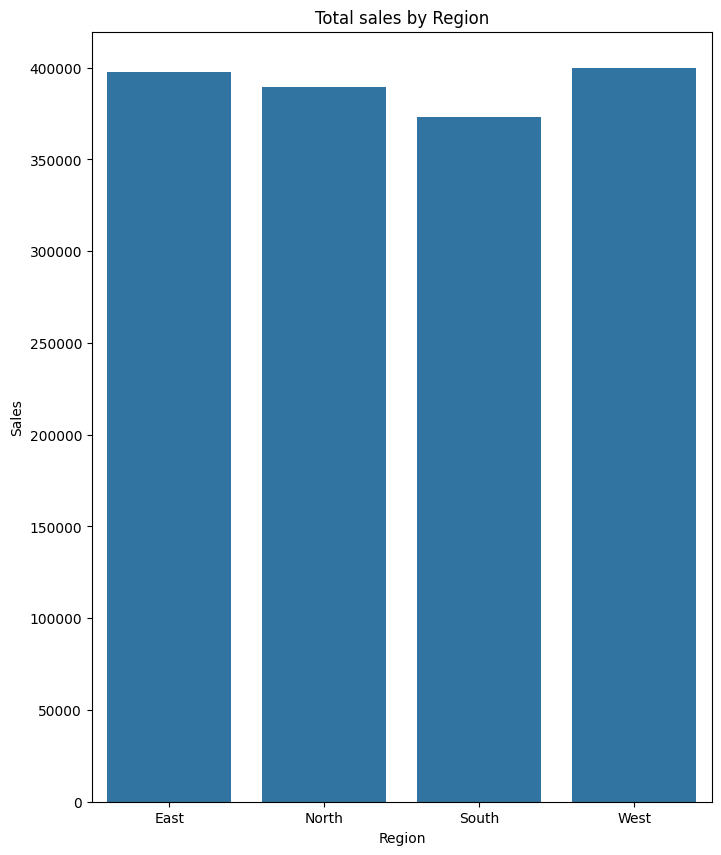

In [46]:
# Visualization
# 1. Bar chart for tiotal sales by region
region_sales=df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8,10))
sns.barplot(x='Region',y='Sales',data=region_sales)
plt.title('Total sales by Region')
plt.show()

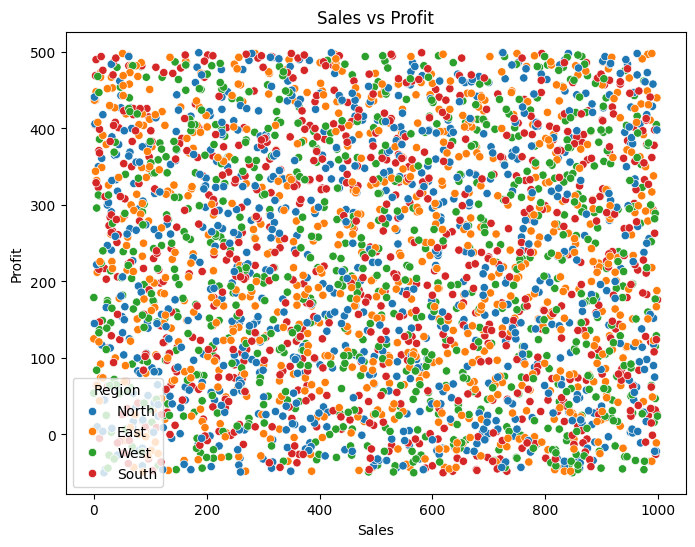

In [51]:
# scatter plot for sales vs profit
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales',y='Profit',hue='Region',data=df)
plt.title('Sales vs Profit')
plt.show()